<a href="https://colab.research.google.com/github/seosw78/test_steamlit01/blob/main/04_%EC%8B%9C%EA%B0%81%ED%99%9401(%EC%9D%B8%EA%B5%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

장례 인구 추이(2020~2070) : https://kostat.go.kr/synap/skin/doc.html?fn=76bb84d94c2822262b9f667e7f6d3524b191a0bb7b16375f41250e861d81011c&rs=/synap/preview/board/207/

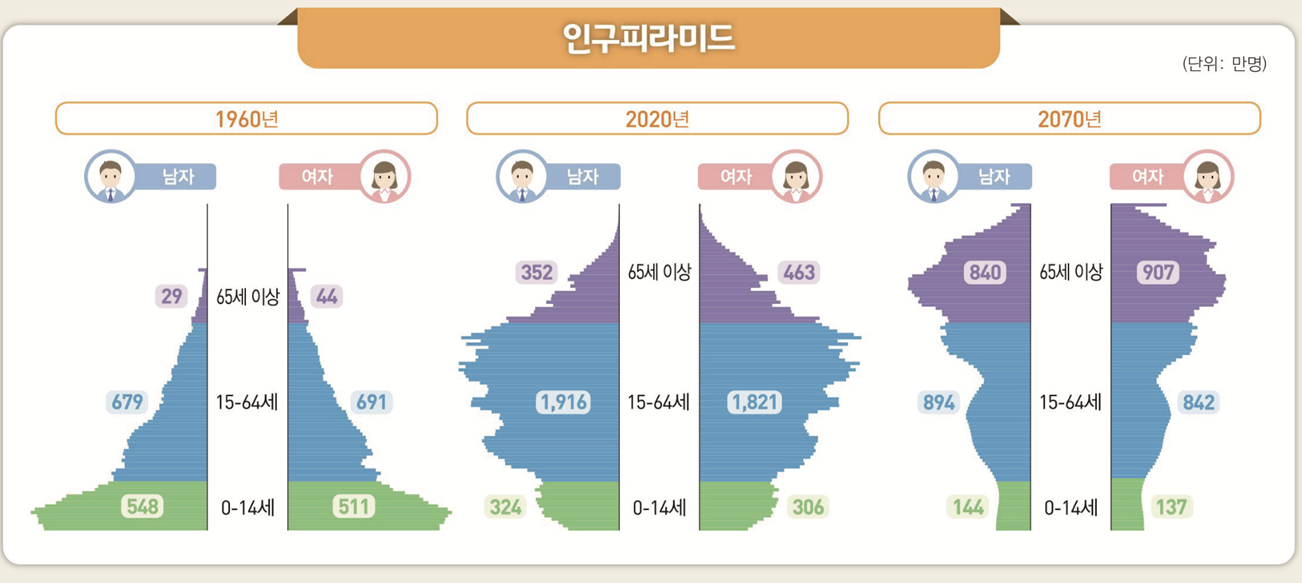

#시각화 #2 : 인구데이터 시각화
 - https://jumin.mois.go.kr - (왼쪽)연령별 인구현황 - (연령구분단위) 1세, (만연령구분) 0~100세 이상
 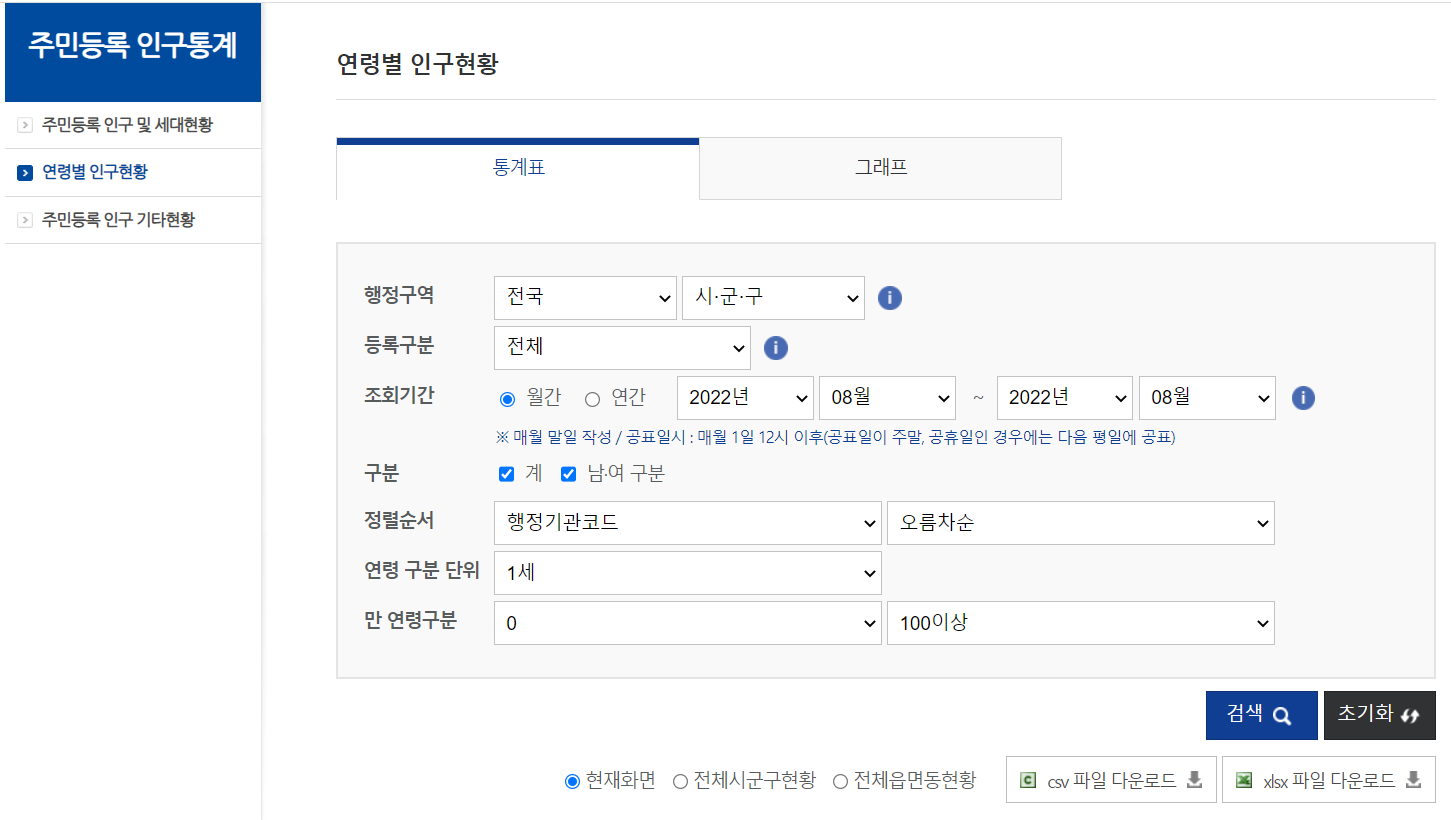

 - 데이터 중
             (1) 2022년08월_계_0세 -> 0세
             (2) 2022년08월_남_84세 -> 남_84세
             (3) 2022년08월_여_100세 이상 -> 여_100세
             
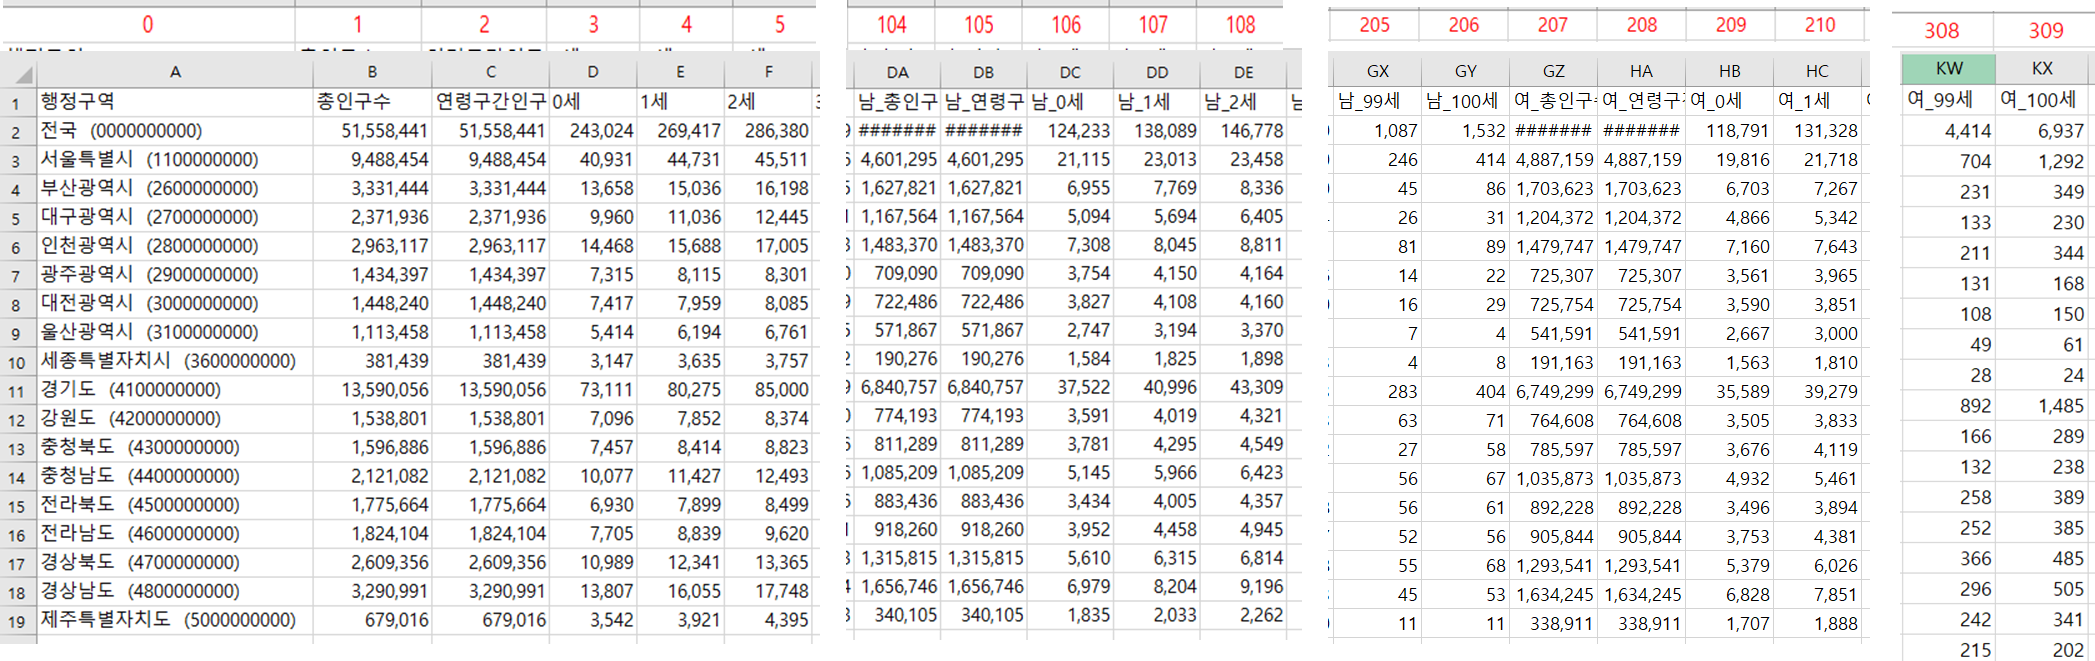

In [ ]:
# 1. 라이브러리 불러오기
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import koreanize_matplotlib

In [ ]:
# 2. 파일 업로드
from google.colab import files
up = files.upload()

Saving 2023_인구.csv to 2023_인구.csv


In [ ]:
# 3. 판다스에서 데이터 불러오기 -
# 한글(encoding='cp949'), 천단위 구분기호 삭제(thousands=',')
df_pop = pd.read_csv('2023_인구.csv', encoding='cp949', thousands=',')
df_pop.head()

,행정구역,2023년08월_계_총인구수,2023년08월_계_연령구간인구수,2023년08월_계_0세,2023년08월_계_1세,2023년08월_계_2세,2023년08월_계_3세,2023년08월_계_4세,2023년08월_계_5세,2023년08월_계_6세,...,2023년08월_여_91세,2023년08월_여_92세,2023년08월_여_93세,2023년08월_여_94세,2023년08월_여_95세,2023년08월_여_96세,2023년08월_여_97세,2023년08월_여_98세,2023년08월_여_99세,2023년08월_여_100세 이상
0,전국 (0000000000),51377213,51377213,232198,254882,271835,288573,315072,343176,378417,...,45490,33412,28101,21633,16130,11202,6992,4823,3013,7403
1,서울특별시 (1100000000),9409466,9409466,38631,41618,43848,44890,48388,51719,56621,...,6334,4731,4051,3301,2408,1759,1064,715,541,1172
2,부산광역시 (2600000000),3302740,3302740,12952,14496,15251,16399,18006,20433,22579,...,2716,1909,1487,1293,1007,685,395,279,167,379
3,대구광역시 (2700000000),2378464,2378464,9494,10778,11462,12855,14008,15718,17703,...,1987,1431,1098,807,660,433,248,158,103,227
4,인천광역시 (2800000000),2985152,2985152,14074,15806,16309,17605,19623,20377,22614,...,2267,1669,1432,1131,800,605,378,289,149,411


In [ ]:
# 4. 데이터 살펴보기
print('데이터 형태 : ', df_pop.shape)
df_pop.info()

데이터 형태 :  (18, 310)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 310 entries, 행정구역 to 2023년08월_여_100세 이상
dtypes: int64(309), object(1)
memory usage: 43.7+ KB


In [ ]:
# 5. 데이터 추출(전체 남성 0,1,~100세, 여성 0, 1, ~100세)
# to_numpy() : 데이터를 넘파일 형태로 변환
man = df_pop.iloc[0,106:207].to_numpy()
woman = df_pop.iloc[0, 209:].to_numpy()
woman

array([113221, 124539, 132510, 140717, 153182, 167086, 184094, 209355,
       217415, 214695, 224556, 234598, 238270, 220969, 220588, 235715,
       230603, 214473, 214766, 233059, 232162, 246680, 284018, 302489,
       296591, 313063, 325102, 329141, 327899, 333265, 339205, 342092,
       316977, 307796, 300061, 296173, 301588, 309018, 313861, 336970,
       374673, 406467, 407983, 413657, 387408, 368955, 369778, 367630,
       396137, 430557, 438268, 431404, 462526, 439589, 463072, 440603,
       412749, 400628, 412589, 375374, 419013, 399920, 475396, 453196,
       402608, 370700, 365656, 336708, 350463, 282188, 262705, 273819,
       206585, 225833, 224897, 220880, 217302, 151624, 171535, 168847,
       184371, 191506, 155944, 142318, 136589, 120343, 108235, 96454,
       84162, 68362, 55325, 45490, 33412, 28101, 21633, 16130, 11202,
       6992, 4823, 3013, 7403], dtype=object)

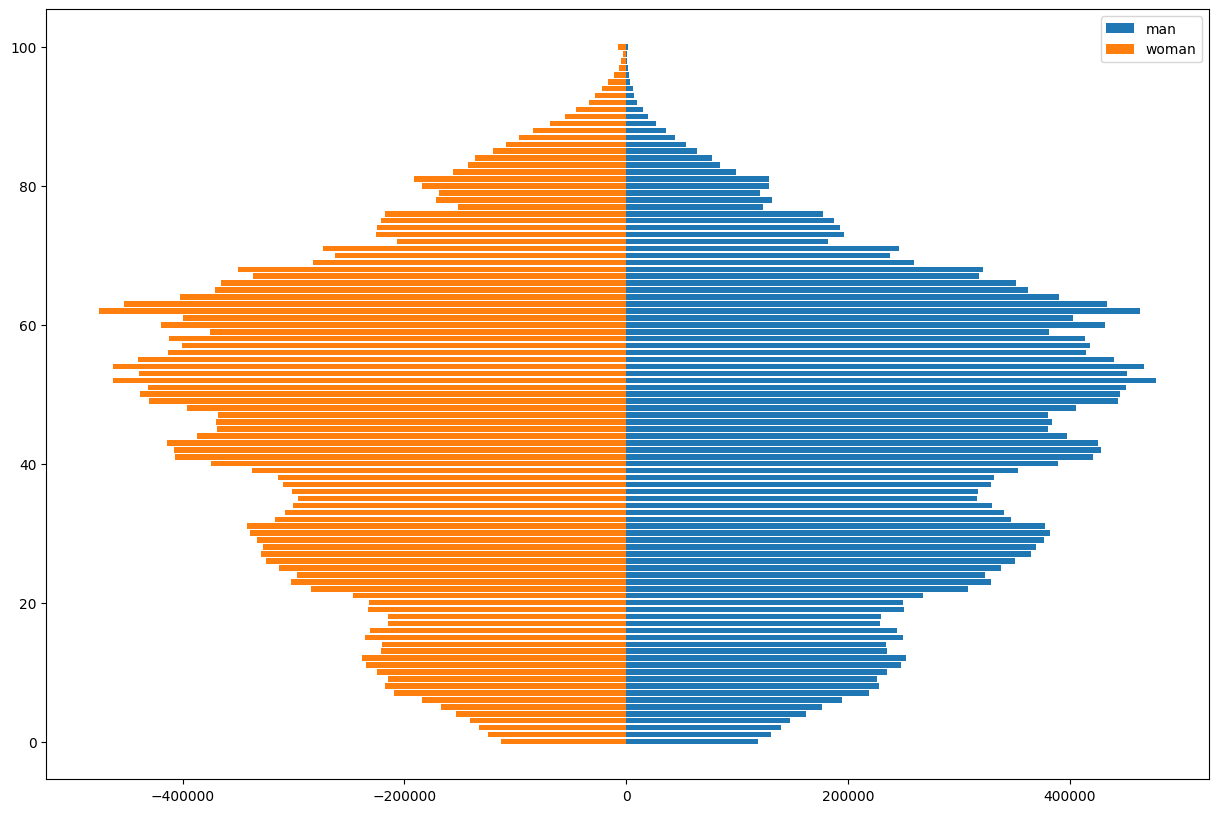

In [ ]:
# 6. 전국 남성여성 가로 막대그래프 그리기
x = np.arange(0,101)

plt.figure(figsize=(15,10))
plt.barh(x, man, label='man')
plt.barh(x, -woman, label='woman')
plt.legend()
plt.show()

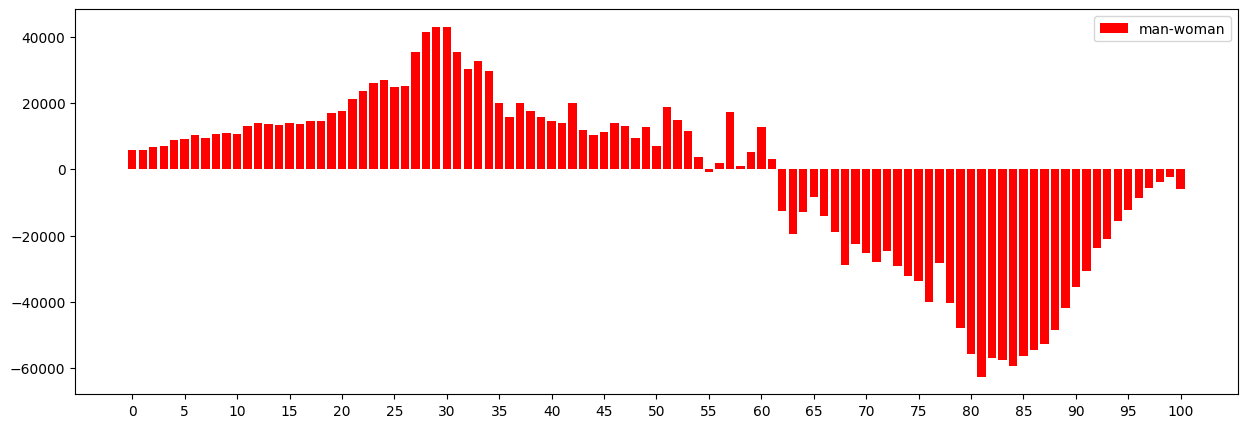

남-여 최대차이 : 29 살,  43003 명 차이
여-남 최대차이 : 81 살,  62628 명 차이


In [ ]:
# 7. 전국 남녀차이 세로 막대그래프

plt.figure(figsize=(15,5))
y = man - woman
plt.bar(x, y, color='r', label='man-woman')
plt.legend()
plt.xticks(np.arange(0,101,5))
plt.show()
print('남-여 최대차이 :', y.argmax(), '살, ', y.max(), '명 차이')
print('여-남 최대차이 :', y.argmin(), '살, ', -y.min(), '명 차이')

# 과제 : 제주도는 과연 삼다도 중 여자 인원수가 많을까?
    1) 제주도 연령대별(0세, 1세, ~100세) 인원 수 추출
    2) 남녀 연령대별 가로 막대 그래프 그리기
    3) 남-여 세로 막대 그래프 그리고, 최대 인원차이 구하기

In [ ]:
df_pop.tail()

,행정구역,2023년08월_계_총인구수,2023년08월_계_연령구간인구수,2023년08월_계_0세,2023년08월_계_1세,2023년08월_계_2세,2023년08월_계_3세,2023년08월_계_4세,2023년08월_계_5세,2023년08월_계_6세,...,2023년08월_여_91세,2023년08월_여_92세,2023년08월_여_93세,2023년08월_여_94세,2023년08월_여_95세,2023년08월_여_96세,2023년08월_여_97세,2023년08월_여_98세,2023년08월_여_99세,2023년08월_여_100세 이상
13,전라북도 (4500000000),1759815,1759815,6670,7226,7982,8594,9473,10662,11784,...,2566,1932,1600,1195,966,654,355,232,142,450
14,전라남도 (4600000000),1808339,1808339,7655,8018,8871,9578,10375,11072,11987,...,3067,2377,2178,1309,944,687,453,332,194,559
15,경상북도 (4700000000),2561623,2561623,10382,11259,12147,13136,14450,15876,17427,...,3677,2601,2077,1591,1234,844,513,386,196,529
16,경상남도 (4800000000),3258309,3258309,13148,14310,16065,17789,19627,22244,25190,...,3555,2642,2116,1577,1098,767,501,333,171,390
17,제주특별자치도 (5000000000),676489,676489,3258,3697,3995,4467,4935,5474,5960,...,793,553,532,349,273,157,112,82,50,300


In [ ]:
# 과제1 : 제주도 연령대별(0세, 1세, ~100세) 인원 수 추출
jeju_man = df_pop.iloc[17,106:207].to_numpy()
jeju_woman = df_pop.iloc[17, 209:].to_numpy()
jeju_woman

array([1631, 1791, 1934, 2161, 2428, 2652, 2862, 3239, 3453, 3453, 3580,
       3732, 3723, 3365, 3436, 3402, 3550, 3125, 2963, 3057, 3023, 2944,
       3498, 3601, 3395, 3482, 3692, 3735, 3839, 3893, 4131, 3958, 3688,
       3671, 3582, 3457, 3731, 3913, 4196, 4558, 5186, 5663, 5756, 5693,
       5444, 4967, 5034, 4891, 5265, 5992, 6019, 6092, 6476, 5875, 5944,
       5847, 5196, 5381, 5126, 4982, 5469, 5027, 5452, 5366, 4773, 4452,
       4331, 4039, 4279, 3161, 2987, 2938, 2558, 2640, 2737, 2632, 2704,
       2209, 2130, 2215, 2125, 2257, 2092, 1879, 1877, 1669, 1530, 1369,
       1228, 1154, 1034, 793, 553, 532, 349, 273, 157, 112, 82, 50, 300],
      dtype=object)

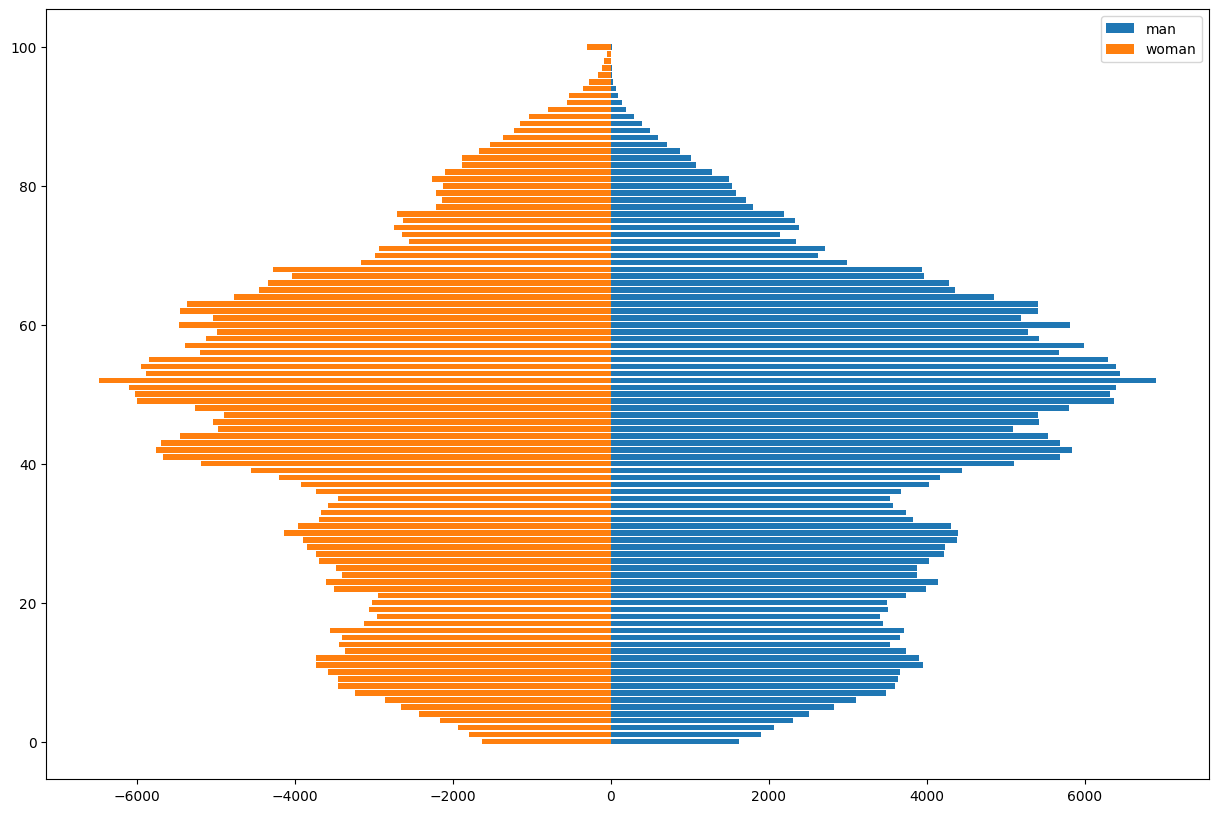

In [ ]:
# 과제2 : 남녀 연령대별 가로 막대 그래프 그리기
x = np.arange(0,101)

plt.figure(figsize=(15,10))
plt.barh(x, jeju_man, label='man')
plt.barh(x, -jeju_woman, label='woman')
plt.legend()
plt.show()

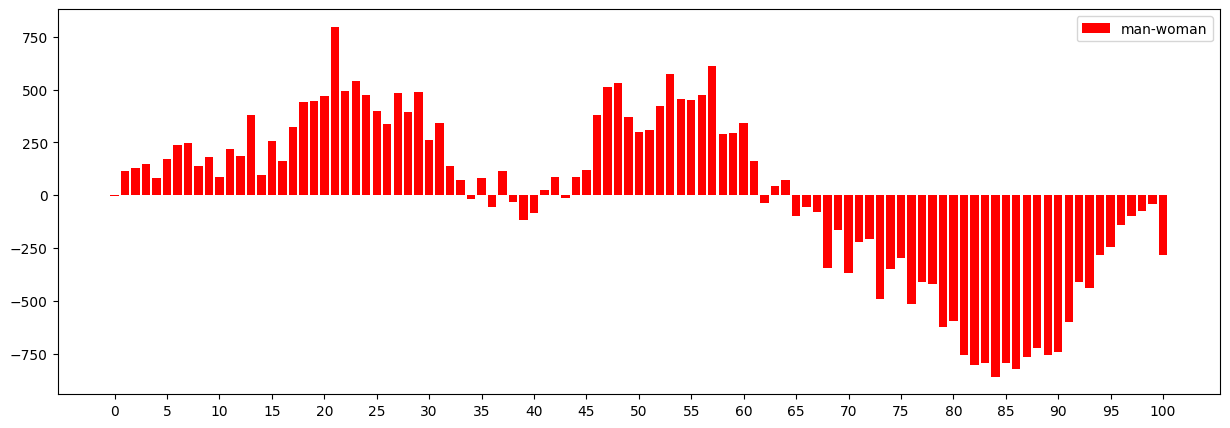

남-여 최대차이 : 21 살,  797 명 차이
여-남 최대차이 : 84 살,  860 명 차이


In [ ]:
# 과제3 : 남-여 세로 막대 그래프 그리고, 최대 인원차이 구하기
plt.figure(figsize=(15,5))
y2 = jeju_man - jeju_woman
plt.bar(x, y2, color='r', label='man-woman')
plt.legend()
plt.xticks(np.arange(0,101,5))
plt.show()
print('남-여 최대차이 :', y2.argmax(), '살, ', y2.max(), '명 차이')
print('여-남 최대차이 :', y2.argmin(), '살, ', -y2.min(), '명 차이')

In [ ]:
#추가과제1 : 제주도는 남자와 여자 인구의 차이는?
y2.sum()

755

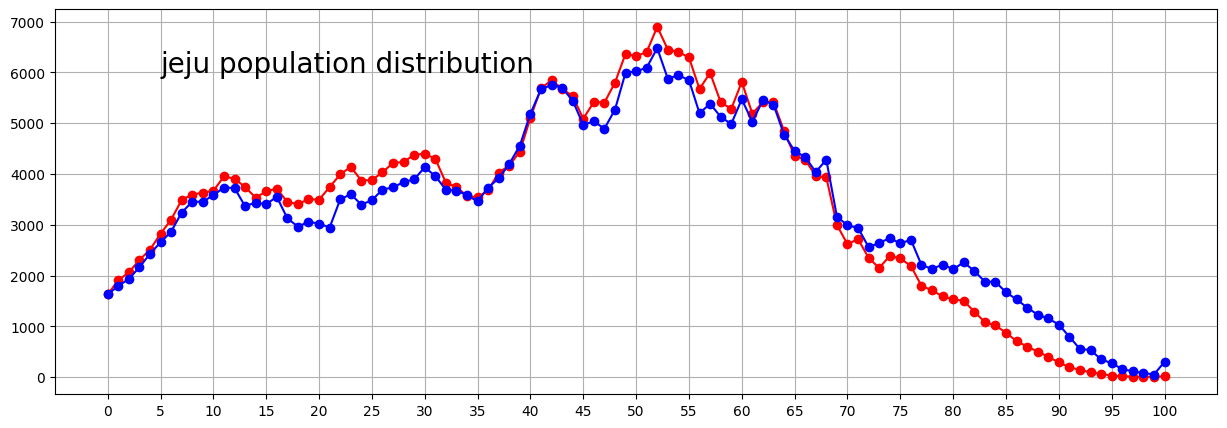

In [ ]:
#추가과제2 : 제주 남자와 여자의 꺾은 선 그래프?
x = np.arange(0,101)

plt.figure(figsize=(15,5))
plt.plot(x, jeju_man,'ro-')
plt.plot(x, jeju_woman, 'bo-')
plt.xticks(np.arange(0,101,5))
plt.grid()
plt.text(5,6000,"jeju population distribution", size=20)
plt.show()

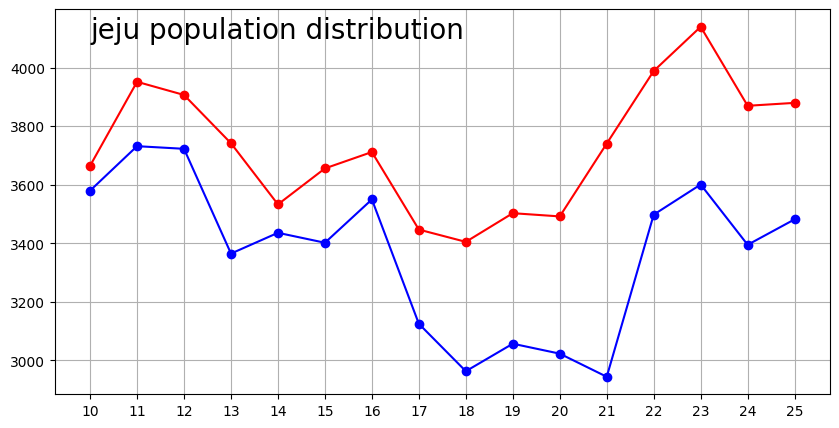

In [ ]:
#추가과제3 : 제주 10~25살의 남자와 여자의 꺾은 선 그래프?
x = np.arange(10,26)

jeju_man10 = jeju_man[10:26]
jeju_woman10 = jeju_woman[10:26]

plt.figure(figsize=(10,5))
plt.plot(x, jeju_man10,'ro-')
plt.plot(x, jeju_woman10, 'bo-')
plt.xticks(np.arange(10,26,1))
plt.grid()
plt.text(10,4100,"jeju population distribution", size=20)
plt.show()

# 참고 : folium 라이브러리
    Python 지도 시각화 라이브러리
    인터랙티브한 지도를 생성하고 마커를 추가하여 시각화하거나 원으로 범위를 표기하고 html 파일로 내보내기 등을 수행할 수 있습니다.
    - 참고사이트 : [링크 텍스트](https://teddylee777.github.io/visualization/folium)
    - 예시
        

In [ ]:
#folium 설치
!pip install folium

In [ ]:
#기본 좌표설정
import folium

# 위도
latitude = 37.575862
# 경도
longitude = 126.976773

m = folium.Map(location=[latitude,longitude],
                       zoom_start=15, #zoom 최대 18
                       width=750,
                       height=500)
m

In [ ]:
#마커 추가
folium.Marker(location=[latitude, longitude],
              popup='광화문',
              tooltip="툴팁 : 광화문").add_to(m)
m

In [ ]:
#행정구역별 인구수 (위도 경도는 도청/시청 소재지)
import numpy as np
import matplotlib.pyplot as plt
import folium

인구 = np.array([9550227, 3359527, 393626,2938429, 1441970, 1454679,
                 1124459, 365309, 13530519, 1536270, 1597179, 2118183,
                 1792476, 1838353, 2630254, 3322373, 675883])
위도 = np.array([37.56608, 35.18002, 35.87154, 35.45619, 35.16023, 36.35060,
                 35.53975, 36.48030, 37.27511, 37.92154, 36.63601, 36.66877,
                 35.81992, 34.81647, 36.57563, 35.23846, 33.48939])
경도 = np.array([126.97806, 129.07498, 128.60181, 126.70594, 126.85151, 127.37488,
                 129.31153, 127.28870, 127.00915, 127.72304, 127.49137, 126.67179,
                 127.10810, 126.46287, 128.50583, 128.69242, 126.50041])

m2 = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

for i in range(len(위도)):
    folium.Circle(
        location = [위도[i], 경도[i]],
        radius = 인구[i]/300, #200~300
        fill_color='blue',
        fill_opacity=0.3
    ).add_to(m2)
m2